In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


from sklearn.ensemble import ExtraTreesRegressor


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score

In [55]:
data = pd.read_csv('/home/maksonvinicio/Documents/GitHub/Data-Science-Projects/Stroke Prediction/data/healthcare-dataset-stroke-data.csv')

data = data.drop(['id'], axis=1)

In [56]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [57]:
X = data.drop(['stroke'], axis=1)
y = data['stroke']

cols = ['ever_married', 'Residence_type']
le = LabelEncoder()
X[cols] = X[cols].apply(le.fit_transform)

ct = ColumnTransformer(transformers=[('ohe', OneHotEncoder(), ['gender', 'work_type', 'smoking_status'])],
                       remainder='passthrough')
X = ct.fit_transform(X)


columns = ['ohe1', 'ohe2', 'ohe3', 'ohe4', 'ohe5', 'ohe6', 'ohe7', 'ohe8', 'ohe9', 'ohe10', 'ohe11', 'ohe12',
           'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type',
           'avg_glucose_level', 'bmi']

X = pd.DataFrame(X, columns=columns)


X = X.astype(np.number)


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.4, random_state=42)


In [58]:
X_train.isna().sum()

ohe1                   0
ohe2                   0
ohe3                   0
ohe4                   0
ohe5                   0
ohe6                   0
ohe7                   0
ohe8                   0
ohe9                   0
ohe10                  0
ohe11                  0
ohe12                  0
age                    0
hypertension           0
heart_disease          0
ever_married           0
Residence_type         0
avg_glucose_level      0
bmi                  117
dtype: int64

In [59]:
estimator = ExtraTreesRegressor(n_estimators=10, random_state=42)
it_imp = IterativeImputer(estimator=estimator, missing_values=np.nan, max_iter=10)

X_train['bmi'] = it_imp.fit_transform(X_train['bmi'].values.reshape(-1, 1))
X_val['bmi'] = it_imp.fit_transform(X_val['bmi'].values.reshape(-1, 1))

/home/maksonvinicio/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/maksonvinicio/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [60]:
y_val.value_counts()

0    1930
1     114
Name: stroke, dtype: int64

In [61]:
cols_scaler = ['age', 'avg_glucose_level', 'bmi']
sc = StandardScaler()
X_train[cols_scaler] = sc.fit_transform(X_train[cols_scaler])
X_val[cols_scaler] = sc.transform(X_val[cols_scaler])

/home/maksonvinicio/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/maksonvinicio/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [62]:
def FeedForward():
    model = Sequential()
    model.add(Dense(units=6, activation='relu', input_dim=19))
    model.add(Dense(units = 6, activation = 'relu'))
    model.add(Dense(units = 6, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [63]:
model = KerasClassifier(FeedForward, epochs=20, batch_size=30, verbose=0)
model.fit(X_train, y_train)

In [64]:
pred = model.predict(X_val)
pred = (pred > 0.5)

In [65]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_score(model, X, y, cv=cv)

array([0.95107633, 0.95107633, 0.95107633, 0.95107633, 0.9520548 ])

# Resultados

In [66]:
print("Relatório de Classificação:\n", classification_report(y_val, pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9442    1.0000    0.9713      1930
           1     0.0000    0.0000    0.0000       114

    accuracy                         0.9442      2044
   macro avg     0.4721    0.5000    0.4857      2044
weighted avg     0.8916    0.9442    0.9171      2044



/home/maksonvinicio/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


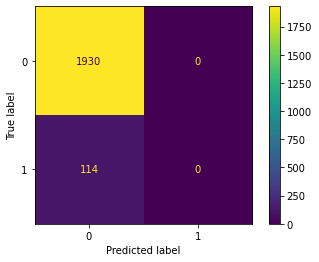

In [100]:
cm = confusion_matrix(y_val, pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()
plt.show()

In [102]:
accuracy_score(y_val, pred)

0.9442270058708415